# Understanding data

## Setup
### Imports
In order to work with data, we need to import some libraries.

In [5]:
import pandas as pd                     # for dataset manipulation (DataFrames)
import sklearn.datasets                 # the datasets we are going to use
import numpy as np                      # allows some mathematical operations
import matplotlib.pyplot as plt         # library used to display graphs
import seaborn as sns                   # more convenient visualization library for dataframes

### Loading the dataset

In [6]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

The dataset is now loaded into the `df` variable, which stands for "DataFrame".
DataFrames are objects proposed by the `pandas` library. They are basically convenient tables, with a lot of built-in functions to manipulate them.

You can see what the dataframe looks like by executing the cell below :

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Data understanding
### Data source and documentation
Before even writing any code, it is important to check where the data is coming from and gather as much information as possible on the data it contains.
The iris dataset - that we loaded above - is a popular dataset to teach machine learning, meaning information is easily accessible on the internet.


#### Questions
**Before beginning the data analysis, find the answers to the following questions:**
- Who created the dataset? When and why?
- Describe briefly what the iris dataset contains.
- What information does the columns contain?
- In particular, what is the `target` column, and what does its values correspond to?

*Hint: We use the `scikit-learn` library to load the dataset.*


#### Answers
*[-The iris dataset was created by British biologist and statistician Ronald A. Fisher in 1936. He created it for the purpose of demonstrating discriminant analysis, a statistical technique for distinguishing between different groups.
- The iris dataset contains data on three species of iris flowers: Setosa, Versicolor, and Virginica. It includes measurements of four features for each flower: sepal length, sepal width, petal length, and petal width.
- The columns in the iris dataset contain the following information:
Sepal length (in centimeters)
Sepal width (in centimeters)
Petal length (in centimeters)
Petal width (in centimeters)
-The target column in the iris dataset corresponds to the species of the iris flower. It is a categorical column with integer values representing different species:

0 corresponds to Setosa
1 corresponds to Versicolor
2 corresponds to Virginica]*

### Getting general information about the dataset

#### Questions

1. How much data does the dataset contain?
2. How many features (columns) are there?
3. Name the different columns and their data types.
4. For each column, check the values of the following statistics: mean, standard deviation, minimum, maximum, and median.
5. How do these values vary within each type of iris? *(Use the code sample below as reference)*

*Hint: You will need to use the pandas functions: `DataFrame.shape`, `DataFrame.head()`, `DataFrame.describe()`, and `DataFrame.info()`. Make sure to [check their documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)!*

In [ ]:
# Below is a code sample to show you how to filter a DataFrame
filtered_data = df[df["sepal length (cm)"] > 5]
filtered_data

In [18]:
#1
data_set_cntn = len(df)
print (f"The data contain {data_set_cntn}")
#2
num_features = len(df.columns)

print("Number of features (columns) in the DataFrame:", num_features)
#3
column_names_and_types = df.dtypes

print("Column Names and Data Types:")
#
column_statistics = df.describe()

print("Statistics for Each Column:")
grouped_data = df.groupby('target')
#5
statistics_within_groups = grouped_data.describe()

print("Statistics within Each Type of Iris:")
print(statistics_within_groups)



The data contain 150
Number of features (columns) in the DataFrame: 5
Column Names and Data Types:
Statistics for Each Column:
Statistics within Each Type of Iris:
       sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0.0                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1.0                 50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2.0                 50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0.0                50.0  3.428  ...             1.575  1.9             50.0   
1.0                50.0  2.770  ...             4.600  5.1             50.0   
2.0     

### Basic validity checks

In order to use a dataset for machine learning, we generally want to have "clean" data. Generally, we want to avoid missing and absurd values, duplicates, and imbalanced datasets.

#### Questions
1. How many rows contain missing data?
2. What does it mean for a dataset to be "balanced"? Do you think this dataset is balanced?
3. Is there any duplicated data in the dataset? In your opinion, is it good or bad for machine learning? Why?

*Hint: You will need to use the `value_counts()` and `duplicated()` functions.*

In [ ]:
# Your code here

*[Your answers here]*

### Making the data more convenient to use

You have probably noticed that the column names are quite long and also contain spaces, which is generally inconvenient in code. You can use the following code to change them:

In [9]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "species"]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


**Bonus question**: How else can you rename columns in a dataframe?

In [10]:
df.duplicated().value_counts()

False 149
True 1
dtype: int64

The `class_float` column is also a bit hard to read, because the classes are represented by numbers. This can be preferable for some algorithms, but for our use case today we will replace these values by explicit names. For this, we will use the `DataFrame.apply()` function.

In [11]:
# This is the function we will apply to the "class_float" column
def name_mapping(number:float):
    """This function maps 0.0, 1.0 and 2.0 to their corresponding values in the iris dataset."""

    name_map = {
        0.0: "class1", # replace by the correct name
        1.0: "class2", # replace by the correct name
        2.0: "class3", # replace by the correct name
    }

    if number not in name_map.keys(): # making sure the number is one of the expected values
        raise ValueError("Not a valid number!")

    return name_map[number] # This is an alternative to using a lot of if/else blocks

In [12]:
# We can now apply the function
df["species"] = df["species"].apply(name_mapping) # We pass the function as parameter, not its result! This is why we must not use parentheses.

In [ ]:
# And check the result
df

## Data visualization

Data visualization will help us:
- Confirming and observing things we already know
- Learning new facts about the data

In this section **keep in mind that the goal of machine learning algorithms would be to classify the different species of iris**.

### Countplot
What does a `countplot` show? With what other function did you get similar results earlier?
Try experimenting with the parameters of the function.

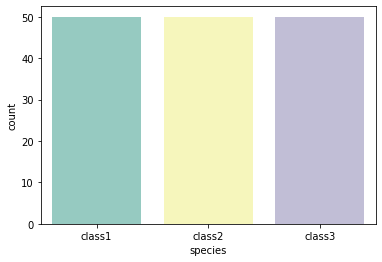

In [18]:
sns.countplot(x='species', data=df, )
#countplot create bar plots that show the counts of unique values in a categorical variable.
sns.countplot(x='species', data=df, palette='Set3', order=df['species'].value_counts().index)
plt.title('Countplot of Species')
plt.ylabel('Count')
#The bars are colored using the 'Set3' color palette.
#The categories on the x-axis are ordered by their counts in descending order.
#The plot has a title 'Countplot of Species' at the top.
plt.show()

### Boxplot
What does a `boxplot` show? With what other function did you get similar results earlier?
In your opinion, why would you need this type of graph?

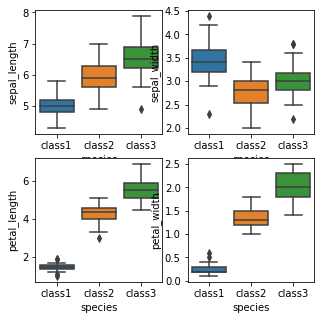

In [22]:
# Utility function to simplify syntax later on
def boxplot(y):
    sns.boxplot(x="species", y=y, data=df)

# We define a figure where we will be adding our graphs
plt.figure(figsize=(5,5))

# And then add the plots to the grid on specific positions
plt.subplot(221)
boxplot('sepal_length')

plt.subplot(222)
boxplot('sepal_width')

plt.subplot(223)
boxplot('petal_length')

plt.subplot(224)
boxplot('petal_width')

plt.show()

### Scatterplot
What does a `scatterplot` show?
What conclusions can you draw from this graph?
Try changing the inputs of the function. Does this change your observations? What new conclusions can you draw from this?

<ipython-input-32-c429d53f41e4>:1: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='petal_length', y='petal_width', hue='species', palette=['pink'], data=df )


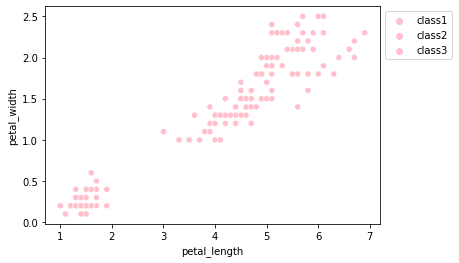

In [32]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', palette='Set3', data=df )
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Displays the legend outside the graph
plt.show()

### Displot
What does a `displot` show?
In the documentation, find what the "kind" parameter does, and try all the kinds of plot.
Can you imagine a use for the kde plots?

In [4]:
sns.displot(df, x="sepal_length", kind="kde", hue="species")

NameError: NameError: name 'sns' is not defined

### Pairplot
What does a `pairplot` show?
Can you draw any new conclusions from it?
In your opinion, what could be the uses of such a graph?

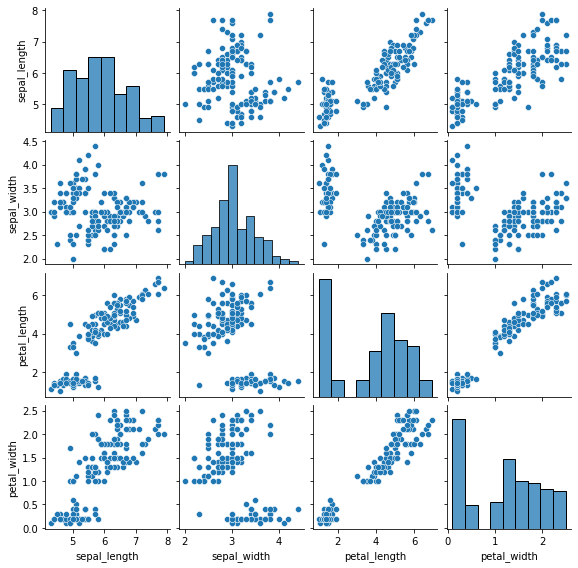

In [51]:
sns.pairplot(df,  height=2)

### Histogram
Histograms will not teach us anything new here, but they can be another way of visualizing data.

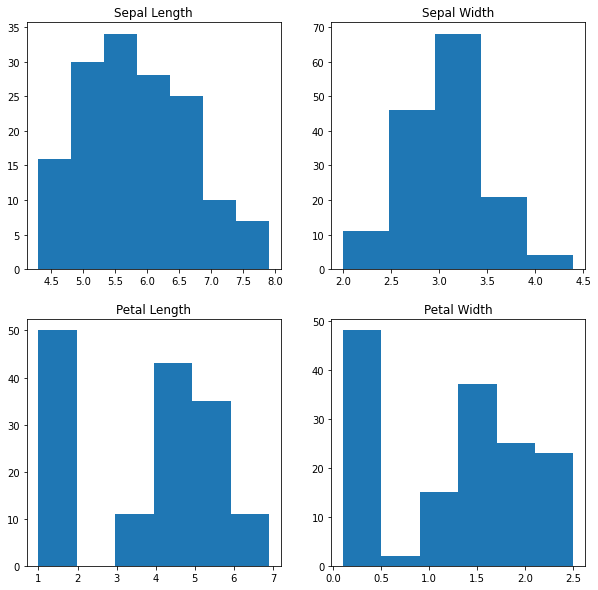

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6);

### Correlation
Correlation shows the relative importance of variables between each other. It can be computed directly with `pandas`.

In [46]:
df.corr(method='pearson')

<ipython-input-46-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


`heatmaps` make it easier to see which correlations are the most important.

<ipython-input-47-4eb2f8f6d9ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot = True)


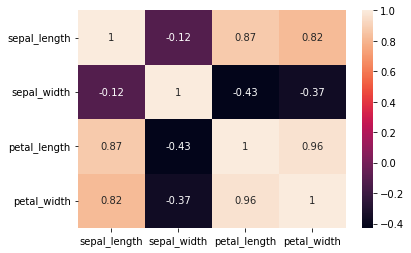

In [47]:
sns.heatmap(df.corr(method='pearson'),annot = True)
plt.show()

### Covariance
In the same way, try displaying the covariance matrix with a `heatmap`!

*Hint: You can access the covariance matrix with the `cov()` function.*

In [48]:
df.corr()

<ipython-input-48-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Try it yourself!
As an exercise, try analysing another dataset that you do no know. There are many datasets freely available on the internet. For example, try loading [another one of sklearn's toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)!

In [ ]:
# Your code here